In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import sys

from modules.path_planning.astar import AStar
from modules.path_planning.BFS import BFS
from modules.path_planning.greedyBestFirst import greedyBestFirst
from modules.path_planning.bidirectDijkstras import BiDirectionalDijkstra
from modules.path_planning.RRT_star import RRT_Star
from modules.path_planning.INFORMED_RRT import Informed_RRT_star
from modules.path_planning.RRT import RRTtree
from modules.path_planning.RRA import RRASEARCHTREE
import time
import random
import pandas as pd
import math
import os
import copy
from os.path import isfile,join


In [11]:
startX, startY, endX, endY = 0,0,0,0
path = None
path_runner = None
img = None
global_dataframe = []

(591, 929)
Starting A* search from grid cell  (591, 929)  to goal cell  (125, 985)
Starting f-value is  469.3527458106536
Path length: 0
Time elapsed: 3.4379372596740723


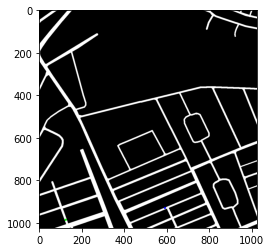

(576, 295)
Starting A* search from grid cell  (576, 295)  to goal cell  (107, 592)
Starting f-value is  555.1306152609492
Found the goal after  56230  node expansions
Found a solution!
Path length: 914
Time elapsed: 2.1403491497039795
Quality/Cost of solution:  934.1248916810282


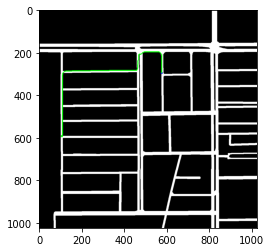

(550, 240)
Starting A* search from grid cell  (550, 240)  to goal cell  (190, 840)
Starting f-value is  699.714227381436
Found the goal after  22785  node expansions
Found a solution!
Path length: 601
Time elapsed: 0.8232858180999756
Quality/Cost of solution:  749.9453095790636


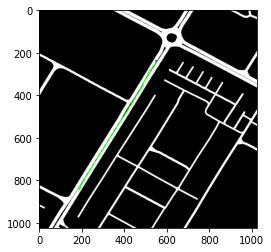

(630, 890)
Starting A* search from grid cell  (630, 890)  to goal cell  (96, 924)
Starting f-value is  535.0813022335951
Found the goal after  4437  node expansions
Found a solution!
Path length: 535
Time elapsed: 0.1674797534942627
Quality/Cost of solution:  548.0832611206855


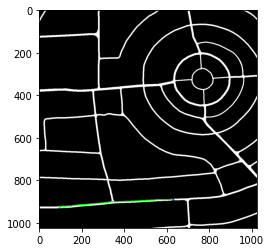

(545, 768)
Starting A* search from grid cell  (545, 768)  to goal cell  (419, 624)
Starting f-value is  191.3426246292237
Found the goal after  2467  node expansions
Found a solution!
Path length: 238
Time elapsed: 0.0948185920715332
Quality/Cost of solution:  274.69343417595195


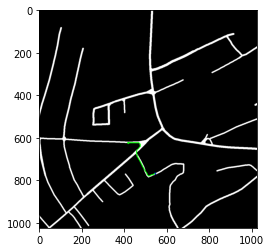

(787, 648)
Starting A* search from grid cell  (787, 648)  to goal cell  (561, 743)
Starting f-value is  245.1550529766825
Found the goal after  4551  node expansions
Found a solution!
Path length: 280
Time elapsed: 0.17741847038269043
Quality/Cost of solution:  338.6467529817265


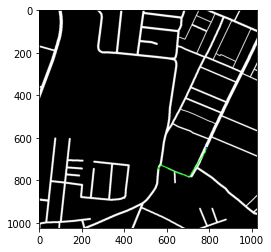

(593, 269)
Starting A* search from grid cell  (593, 269)  to goal cell  (174, 965)
Starting f-value is  812.3896848188066
Found the goal after  127726  node expansions
Found a solution!
Path length: 1490
Time elapsed: 5.035367727279663
Quality/Cost of solution:  1571.0142853498749


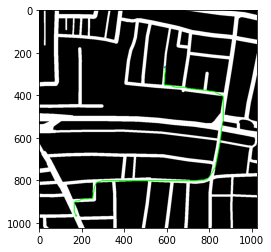

(774, 33)
Starting A* search from grid cell  (774, 33)  to goal cell  (108, 104)
Starting f-value is  669.7738424274271
Found the goal after  18602  node expansions
Found a solution!
Path length: 1096
Time elapsed: 0.6911847591400146
Quality/Cost of solution:  1259.8569978244957


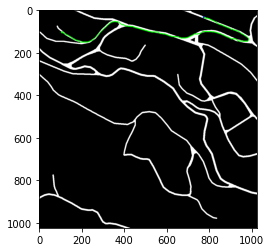

(801, 974)
Starting A* search from grid cell  (801, 974)  to goal cell  (584, 173)
Starting f-value is  829.873484333606
Found the goal after  45715  node expansions
Found a solution!
Path length: 1108
Time elapsed: 1.7468576431274414
Quality/Cost of solution:  1351.8002153625057


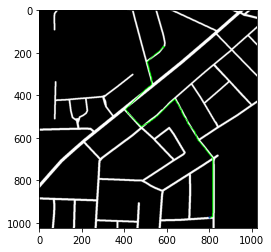

,ASTAR
102945_mask.png,"[0.0, 3.4379372596740723s, ((591, 929), (125, ..."
103341_mask.png,"[934.1248916810282, 2.1403491497039795s, ((576..."
104350_mask.png,"[749.9453095790636, 0.8232858180999756s, ((550..."
107770_mask.png,"[548.0832611206855, 0.1674797534942627s, ((630..."
109942_mask.png,"[274.69343417595195, 0.0948185920715332s, ((54..."
11168_mask.png,"[338.6467529817265, 0.17741847038269043s, ((78..."
113817_mask.png,"[1571.0142853498749, 5.035367727279663s, ((593..."
117090_mask.png,"[1259.8569978244957, 0.6911847591400146s, ((77..."
117414_mask.png,"[1351.8002153625057, 1.7468576431274414s, ((80..."
export_dataframe.csv,None


In [22]:
def imageGRABBER(test_folder, path_directory_holder, csv_file_path, list_of_planning_algorithms):
    global path, path_runner, img
    file_list = os.listdir(test_folder)
    df = pd.DataFrame(None, index=file_list)
    if os.path.isdir(path_directory_holder) == False:
        os.mkdir(path_directory_holder)
    for p in list_of_planning_algorithms:
        if os.path.isdir(os.path.join(path_directory_holder, p)) == False:
            os.mkdir(os.path.join(path_directory_holder, p))
        df[p] = None
    
    indy = 0
    for image_path in file_list:
        if '.csv' in image_path:
            continue
        img = cv2.imread(os.path.join(test_folder, image_path))
        startPos = tuple(random.randint(0, len(img)-1) for _ in range(2))
        while np.array_equal(img[startPos[1]][startPos[0]], [0, 0, 0]):
            startPos = tuple(random.randint(0, len(img)-1) for _ in range(2))
        
        print(startPos)

        endPos = tuple(random.randint(0, len(img)-1) for _ in range(2))
        while np.array_equal(img[endPos[1]][endPos[0]], [0, 0, 0]):
            endPos = tuple(random.randint(0, len(img)-1) for _ in range(2))
            

        img = cv2.circle(img,startPos,radius=5,color=(0,0,255),thickness=-1)
        img = cv2.circle(img,endPos,radius=5,color=(0,255,0),thickness=-1)
        
        for algoName in list_of_planning_algorithms:
            img_copy = img.copy()
            start = time.time()

            if algoName.lower() == "astar" :

        #Run the pathfinding algorithm
                path_runner = AStar(startPos,endPos,copy.deepcopy(img_copy),"image")
                path = path_runner.run()
                print("Path length:",len(path))
    
            elif algoName == "bfs":
                path_runner = BFS(startPos,endPos,copy.deepcopy(img_copy),"image")
                path = path_runner.run()
    
            elif algoName == "greedyBestFirst":
                path_runner = greedyBestFirst(startPos,endPos,copy.deepcopy(img_copy),"image")
                path = path_runner.run()
            elif algoName == "bidirectDijkstras":
                path_runner = BiDirectionalDijkstra(startPos,endPos,copy.deepcopy(img_copy),"image")
                path = path_runner.run()
            elif algoName == "RRT":
                path_runner = RRTtree(startPos, endPos, 4, 10000, copy.deepcopy(img_copy), "image")
                path = path_runner.run()
    
            elif algoName == "RRT_Star":
                path_runner = RRT_Star(startPos, endPos, 10, 10000, 50, copy.deepcopy(img_copy))
                path = path_runner.run()
    
            elif algoName == "INFORMED RRT*":
                path_runner = Informed_RRT_star(startPos, endPos, 10000, 10, 30, 150, copy.deepcopy(img_copy))
                path = path_runner.run()
    
            elif algoName == "RRA*" or algoName == "RRA":
                path_runner = RRASEARCHTREE(startPos, endPos, copy.deepcopy(img_copy), "image")
                path = path_runner.pathCalculation()        

        
            else:
                print("No valid algorithm found for the algorithm name given...exiting")
            
            
            
            end = time.time()
            print("Time elapsed:", end-start)
            solution_quality = 0.0
            if path is not None and len(path) != 0:
                map_path = []
                first_point = path[0]
                second_point = None

                for pos in path:
                    if pos != first_point:
                        second_point = pos
                        cv2.line(img_copy, first_point, second_point, color=(0, 255, 0), thickness=3)
                    if pos != path[0]:
                        solution_quality += math.hypot((first_point[0] - second_point[0]),(first_point[1] - second_point[1]))
                    first_point = pos
        
        #img[pos[1]][pos[0]] = [0,255,0]

                print('Quality/Cost of solution: ', solution_quality)
            cv2.imwrite(os.path.join(path_directory_holder, algoName)+'/'+image_path,img_copy)
            df[algoName][indy] = [str(solution_quality), str(end-start)+'s', str((startPos, endPos))]
        

            plt.imshow(img_copy)
            plt.show()
        indy +=1
    display(df)
    df.to_csv (csv_file_path, header=True) 

#path to images, path to save resulting files, path to csv. E
imageGRABBER("C:/Users/charles/Downloads/Path-Planning-On-Aerial-Images-main-20220523T022800Z-001/Path-Planning-On-Aerial-Images-main/data/processedImages/", "C:/Users/charles/Downloads/overlayed_path_images", "C:/Users/charles/Downloads/Path-Planning-On-Aerial-Images-main-20220523T022800Z-001/Path-Planning-On-Aerial-Images-main/data/processedImages/export_dataframe.csv",['ASTAR'])

    
    